In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [91]:
image=cv2.imread('data.jpg')
image=cv2.resize(image,(512,512))

In [92]:
image=image.reshape(512*512,3)

In [93]:
X=image
X.shape

(262144, 3)

In [94]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [95]:
import random

In [96]:
def randominit(k):
    centroids=[]
    while len(centroids)<k:
        c=image[random.randint(0,len(image)-1)]
        centroids.append(c)
    return centroids

In [97]:
randominit(3)

[array([71, 68, 77], dtype=uint8),
 array([46, 48, 59], dtype=uint8),
 array([133, 139, 150], dtype=uint8)]

In [98]:
def kmeans(k):
    centroids=randominit(k)
    assignments=[0]*len(X)
    for i in range(10):
        for i in range(len(X)):
            distances=np.array([distance(X[i],j) for j in centroids])
            assignments[i]=np.argmin(distances)
        centroids=[np.mean(X[np.array(assignments)==j],axis=0) for j in range(k)]
    return centroids,assignments

In [99]:
centroids,assignments=kmeans(3)

In [100]:
centroids

[array([36.9755052 , 39.04116363, 67.54539564]),
 array([200.23903186, 200.91282168, 206.48667951]),
 array([109.37448008, 122.21425751, 146.93121907])]

In [101]:
centroids=np.array(centroids,dtype=np.uint8)

In [102]:
centroids

array([[ 36,  39,  67],
       [200, 200, 206],
       [109, 122, 146]], dtype=uint8)

In [103]:
def cluster(X,assignments,centroids):
    for i in range(len(X)):
        X[i]=centroids[assignments[i]]
    return X

In [104]:
finalimage=cluster(X,assignments,centroids)

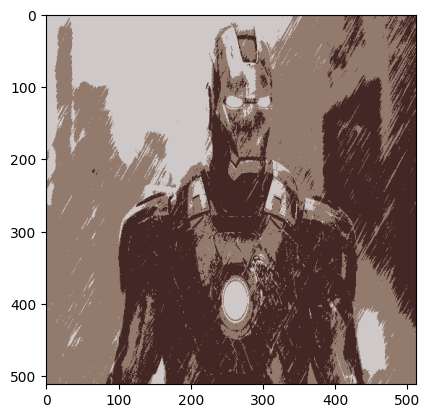

In [105]:
finalimage=cv2.cvtColor(finalimage.reshape(512,512,3),cv2.COLOR_BGR2RGB)
plt.imshow(finalimage)